# Import Statements

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotnine as plt2
from plotnine import aes, ggplot
import math
from tqdm import tqdm
import scipy.stats as stats
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from utility import VariableInfo as var_info
from utility import Overview as ovr
from utility import Vizualisations as viz

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Initial data preparation

## Loading data

In [32]:
df = pd.read_csv('./Dataset/loan.csv', low_memory=False)
df.shape

(2260668, 145)

## Data Inspection

In [33]:
df = df.astype({"application_type":"category", \
                "verification_status":"category", \
                "loan_status":"category", \
                "initial_list_status":"category", \
                "purpose":"category", \
                "pymnt_plan":"category", \
                "term":"category", \
                "disbursement_method":"category", \
                "debt_settlement_flag":"category", \
                "hardship_flag":"category", \
                "grade":"category", \
                "sub_grade":"category", \
                "addr_state":"category", \
                "emp_length":"category", \
                "emp_title":"category", \
                "home_ownership":"category", \
                "earliest_cr_line":"datetime64[ns]", \
                "next_pymnt_d":"datetime64[ns]", \
                "issue_d":"datetime64[ns]", \
                "last_credit_pull_d":"datetime64[ns]", \
                "last_pymnt_d":"datetime64[ns]"})


C:\Users\abhis\AppData\Local\Temp\ipykernel_26904\3801819900.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
C:\Users\abhis\AppData\Local\Temp\ipykernel_26904\3801819900.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
C:\Users\abhis\AppData\Local\Temp\ipykernel_26904\3801819900.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
C:\Users\abhis\AppData\Local\Temp\ipykernel_26904\3801819900.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a form

In [34]:
missing_info_greaterthan_50 = var_info.MissingValues.missing_values_info(df, 50)
print(f'number of missing values greater than 50% : {missing_info_greaterthan_50.shape[0]}')
missing_info_greaterthan_50

number of missing values greater than 50% : 44


,Variable,Missing %
0,id,100.000000
1,member_id,100.000000
2,url,100.000000
3,desc,94.423551
4,mths_since_last_delinq,51.246003
5,mths_since_last_record,84.112837
6,next_pymnt_d,57.664681
7,mths_since_last_major_derog,74.309585
8,annual_inc_joint,94.660428
9,dti_joint,94.660605


In [35]:
missing_columns = list(missing_info_greaterthan_50[missing_info_greaterthan_50["Missing %"] > 60]["Variable"])
missing_columns.remove('id')
missing_columns.extend(["emp_title", "next_pymnt_d", "initial_list_status", "pymnt_plan", "hardship_flag", "policy_code"])
len(missing_columns)

47

In [36]:
df = df.drop(columns = missing_columns)
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 98 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   id                          0 non-null        float64       
 1   loan_amnt                   2260668 non-null  int64         
 2   funded_amnt                 2260668 non-null  int64         
 3   funded_amnt_inv             2260668 non-null  float64       
 4   term                        2260668 non-null  category      
 5   int_rate                    2260668 non-null  float64       
 6   installment                 2260668 non-null  float64       
 7   grade                       2260668 non-null  category      
 8   sub_grade                   2260668 non-null  category      
 9   emp_length                  2113761 non-null  category      
 10  home_ownership              2260668 non-null  category      
 11  annual_inc              

### Retaining records with loan status only Fully Paid or Charged Off

In [37]:
df = df[(df["loan_status"] == "Fully Paid") | (df["loan_status"] == "Charged Off")].reset_index()
df.shape

(1303607, 99)

### Removing columns that are not valid for question 1 and also some correlated and repetitive columns

In [38]:
cols_to_remove = ["loan_amnt", \
                  "funded_amnt_inv", \
                  "out_prncp_inv", \
                  "out_prncp", \
                  "total_pymnt", \
                  "total_pymnt_inv", \
                  "total_rec_prncp", \
                  "total_rec_int", \
                  "total_rec_late_fee", \
                  "recoveries", \
                  "collection_recovery_fee", \
                  "last_pymnt_amnt", \
                  "last_pymnt_d", "grade", "sub_grade", "installment", "term", "title"]

df.drop(columns=cols_to_remove, inplace=True)
df.shape

(1303607, 81)

### Retaining only individual applicants

In [39]:
df = df[df["application_type"] == "Individual"]
df.shape

(1280370, 81)

### Removing the below columns as it is not required for the 1st question

In [40]:
cols_to_remove = ["application_type", "disbursement_method", "debt_settlement_flag"]
df.drop(columns=cols_to_remove, inplace=True)
df.shape

(1280370, 78)

### Changing Source verfied status to verified as there are multiple categories for the same

In [41]:
df["verification_status"] = df["verification_status"].apply(lambda x : "Verified" if x == "Source Verified" else x)
df["verification_status"].value_counts()

verification_status
Verified        895658
Not Verified    384712
Name: count, dtype: int64

### Removing home ownership categories which has less records

In [42]:
home_ownership_lst = ["ANY", "OTHER", "NONE"]
df = df[~df["home_ownership"].isin(home_ownership_lst)]
df["home_ownership"].value_counts()

home_ownership
MORTGAGE    629720
RENT        512524
OWN         137669
ANY              0
NONE             0
OTHER            0
Name: count, dtype: int64

In [43]:
df.drop(columns=["index"], inplace=True)
df.shape

(1279913, 77)

# Data overview

In [44]:
out = ovr.data_overview(df,[])
out

,Observation,Value
0,Number of rows,1279913
1,Number of columns,77
2,Number of numeric variables,67
3,Number of categorical variables,5
4,Number of text & id variables,2
5,Number of logical variables,0
6,Number of date variables,3
7,Number of uniform variables,0
8,% of complete case rows,23.376623
9,% of row with missing values (<50%),79.220779


## Numerical data overview

In [45]:
out = ovr.numerical_overview(df, [])
out

,Variable name,+ve value count,-ve value count,Zero count,Unique count,+ve infinity count,-ve infinity count,missing %,Count of outliers
0,id,0,0,0,1,0,0,100.000000,0
1,funded_amnt,1279913,0,0,1547,0,0,0.000000,5491
2,int_rate,1279913,0,0,654,0,0,0.000000,22449
3,annual_inc,1279913,0,0,62046,0,0,0.000000,62837
4,dti,1279148,1,764,4787,0,0,0.000000,1164
5,delinq_2yrs,246761,0,1033152,30,0,0,0.000000,246761
6,inq_last_6mths,550890,0,729022,10,0,0,0.000078,69510
7,mths_since_last_delinq,632658,0,1691,164,0,0,50.438116,304
8,open_acc,1279902,0,11,84,0,0,0.000000,43709
9,pub_rec,216778,0,1063135,37,0,0,0.000000,216778


In [46]:
out = ovr.stat_overview(df, ["id"])
out

,Variable name,Count,Mean,Standard deviation,Variance,Min,25th Percentile,50th Percentile,75th Percentile,Max,10th Percentile,90th Percentile,95th Percentile
0,funded_amnt,1279913,14324.40,8640.46,7.465761e+07,500,7875.00,12000.00,20000.00,40000,5000.00,28000.00,32000.00
1,int_rate,1279913,13.23,4.74,2.244000e+01,5.31,9.75,12.74,15.99,30.99,7.49,19.47,21.99
2,annual_inc,1279913,76493.56,70441.93,4.962065e+09,2400.0,46000.00,65000.00,90000.00,10999200.0,34992.00,125000.00,155000.00
3,dti,1279913,18.01,8.36,6.989000e+01,-1.0,11.75,17.53,23.89,49.96,7.25,29.51,32.59
4,delinq_2yrs,1279913,0.32,0.88,7.700000e-01,0.0,0.00,0.00,0.00,39.0,0.00,1.00,2.00
5,inq_last_6mths,1279912,0.66,0.94,8.900000e-01,0.0,0.00,0.00,1.00,8.0,0.00,2.00,3.00
6,mths_since_last_delinq,634349,34.32,21.92,4.805600e+02,0.0,16.00,31.00,50.00,226.0,8.00,68.00,74.00
7,open_acc,1279913,11.60,5.47,2.987000e+01,0.0,8.00,11.00,14.00,90.0,6.00,19.00,22.00
8,pub_rec,1279913,0.22,0.60,3.700000e-01,0.0,0.00,0.00,0.00,86.0,0.00,1.00,1.00
9,revol_bal,1279913,16249.31,22335.15,4.988589e+08,0,5963.00,11145.00,19751.00,2904836,3046.00,32398.00,43298.00


## Categorical Data overview

In [47]:
out = ovr.categorical_feature_overview(df, [])
out

,Variable name,Unique categories,% missing values
0,emp_length,12,5.632
1,home_ownership,3,0.000
2,loan_status,2,0.000
3,purpose,14,0.000
4,addr_state,51,0.000


## Target Variable overview

In [48]:
def target_variable_info(dataset, target_variable):
    classes = np.unique(dataset[target_variable])

    columns = ["Observation", "Value"]
    df = pd.DataFrame(columns=columns)

    df = var_info.add_dataRow(df, ["Number of classes", len(classes)], columns)
    for xclass in classes:
        value = dataset[dataset[target_variable] == xclass].shape[0]
        df = var_info.add_dataRow(
            df, ["Number of data points in class " + str(xclass), value], columns)

    return df

In [49]:
target_variable_info(df, "loan_status")

,Observation,Value
0,Number of classes,2
1,Number of data points in class Charged Off,255840
2,Number of data points in class Fully Paid,1024073


# Exploratory Data Analysis

## Categorical data (Univariate Analysis)

### Analysis

1. application type : "Individual" : 1280370 datapoints, "Joint App" : 23237 datapoints. (Drop column)
2. verification type : "Source Verified" should be same as "Verified". (Change them to Verified)
3. loan_status (Target column) : has data imbalance - use SMOTE or Upsampling techniques
4. Purposes : debt_consolidation and credit_card has 80.03% of data
5. term : 36 month has 75.84% of the data
6. disbursement_method : 99.55% of the data is by cash. (Drop column)
7. debt_settlement_flag : If it is 'Y' it is almost Charged off except for 4 records. Check if this is a variable derived after the closure of that account
8. grade, sub_grade : Plot grade and sub-grade vs loan_status
9. state : Perform risk analysis based on state
10. home_ownership : ANY, OTHER, NONE have very less values. Drop the rows and limit the categories



### Purpose

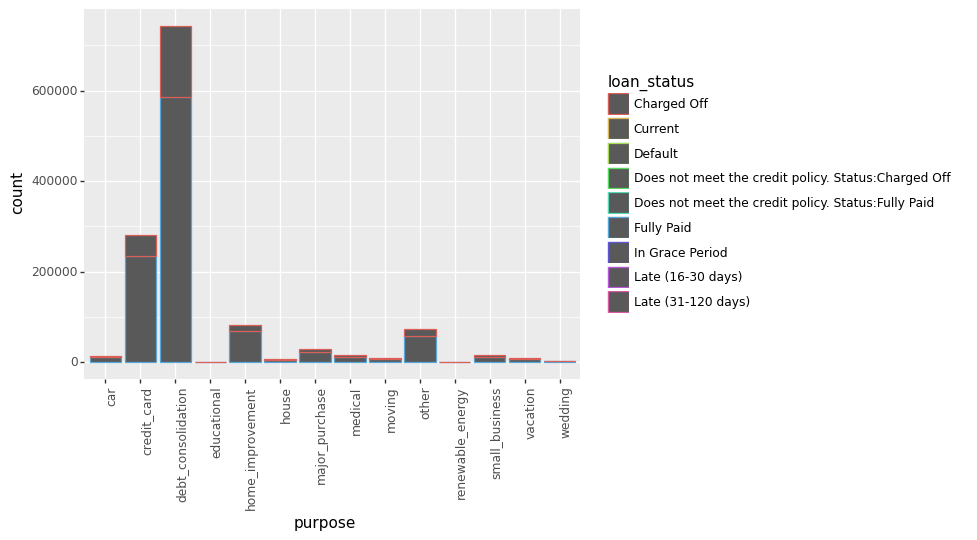

<ggplot: (133762724265)>

In [50]:
# temp_df = pd.DataFrame(df["application_type"].value_counts())
# temp_df["application_type"] = temp_df.index

(
    ggplot(df)
    + aes(x= "purpose", colour= "loan_status")
    + plt2.geom_bar()
    + plt2.theme(axis_text_x = plt2.element_text(angle = 90, hjust = 0))
    # + plt2.facet_wrap("loan_status")
)


In [51]:
df["purpose"].value_counts()

purpose
debt_consolidation    742952
credit_card           281603
home_improvement       82628
other                  73617
major_purchase         27883
small_business         14780
medical                14599
car                    13920
moving                  8995
vacation                8608
house                   6817
wedding                 2293
renewable_energy         895
educational              323
Name: count, dtype: int64

C:\Users\abhis\AppData\Local\Temp\ipykernel_26904\924876410.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



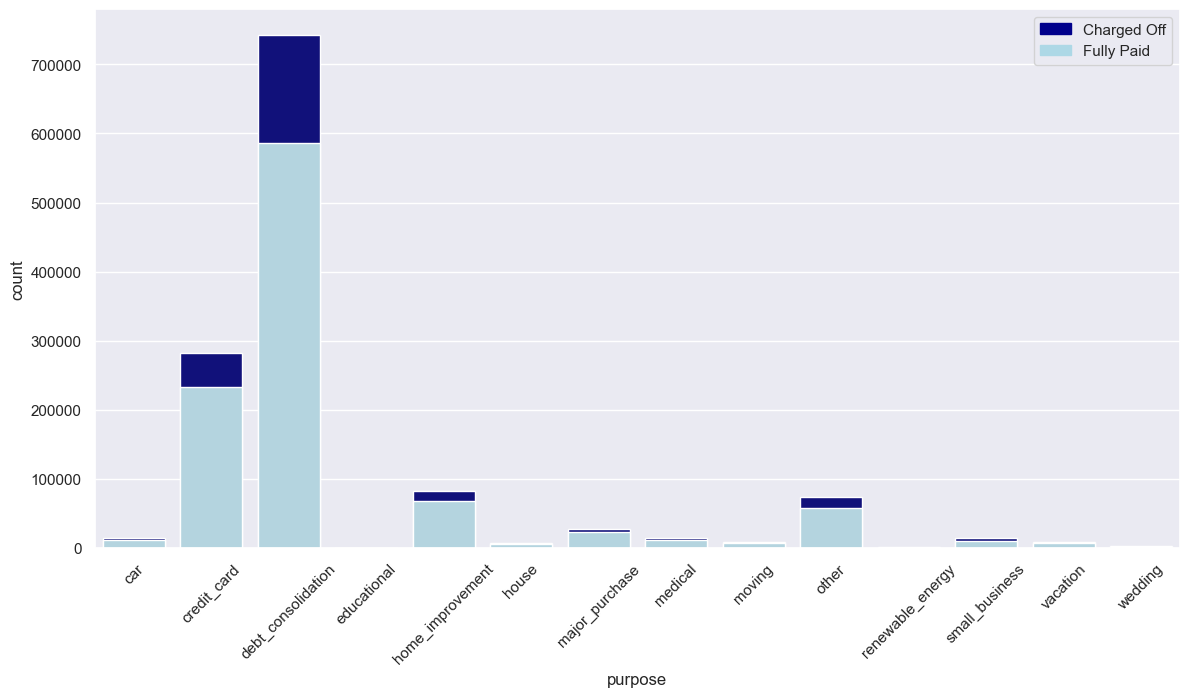

In [52]:
import matplotlib.patches as mpatches

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(14, 7))

# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = pd.DataFrame(df.groupby('purpose')['purpose'].count())
total.rename(columns={"purpose":"count"}, inplace=True)
total["purpose"] = total.index

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="purpose", y="count", data=total, color='darkblue')

# bottom bar ->  take only smoker=Yes values from the data
loan_status = df[df.loan_status == 'Fully Paid']

total2 = pd.DataFrame(loan_status.groupby('purpose')['purpose'].count())
total2.rename(columns={"purpose":"count"}, inplace=True)
total2["purpose"] = total2.index

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="purpose", y="count", data=total2, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Charged Off')
bottom_bar = mpatches.Patch(color='lightblue', label='Fully Paid')
plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation=45)

# show the graph
plt.show()

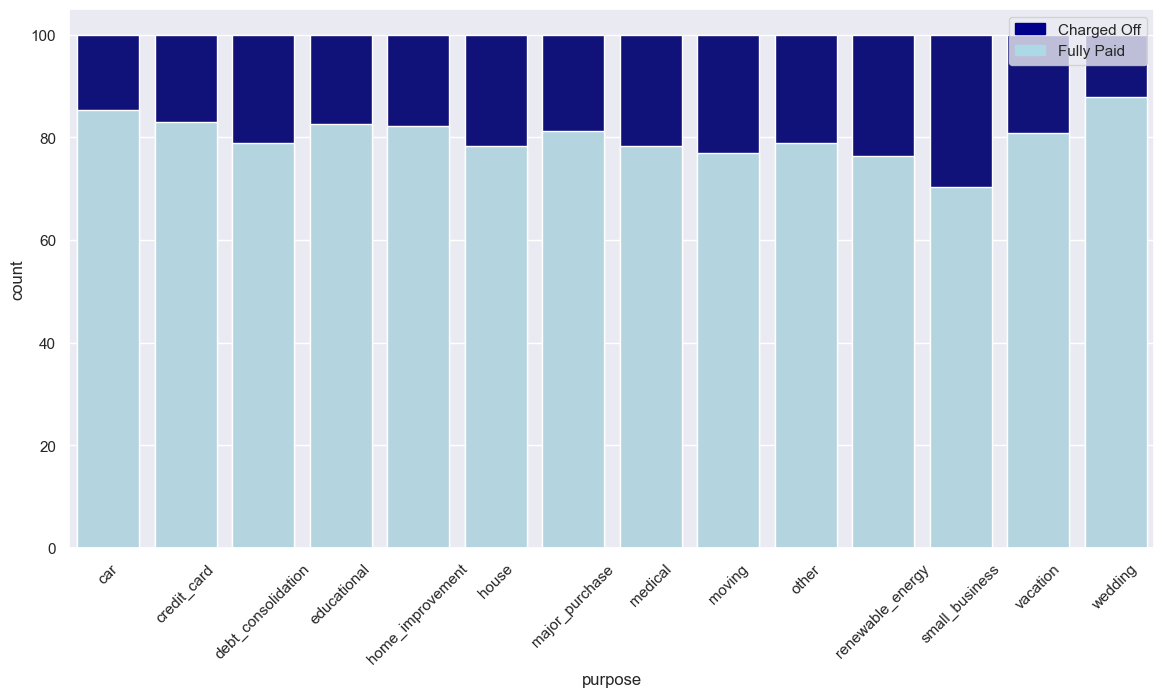

In [53]:

# set the figure size
plt.figure(figsize=(14, 7))

# from raw value to percentage
total2['count'] = [i / j * 100 for i,j in zip(total2['count'], total['count'])]
total['count'] = [i / j * 100 for i,j in zip(total['count'], total['count'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="purpose",  y="count", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="purpose", y="count", data=total2, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Charged Off')
bottom_bar = mpatches.Patch(color='lightblue', label='Fully Paid')
plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation=45)

# show the graph
plt.show()

### emp_length

C:\Users\abhis\AppData\Local\Temp\ipykernel_26904\298148947.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



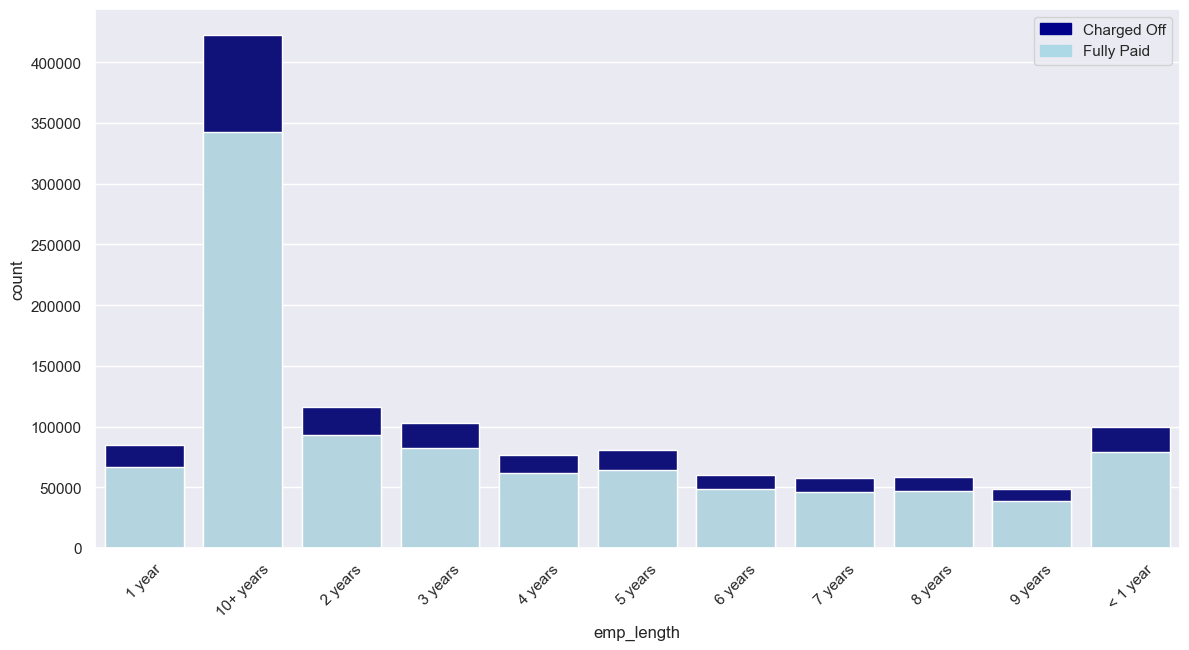

In [54]:


sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(14, 7))

# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = pd.DataFrame(df.groupby('emp_length')['emp_length'].count())
total.rename(columns={"emp_length":"count"}, inplace=True)
total["emp_length"] = total.index

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="emp_length", y="count", data=total, color='darkblue')

# bottom bar ->  take only smoker=Yes values from the data
loan_status = df[df.loan_status == 'Fully Paid']

total2 = pd.DataFrame(loan_status.groupby('emp_length')['emp_length'].count())
total2.rename(columns={"emp_length":"count"}, inplace=True)
total2["emp_length"] = total2.index

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="emp_length", y="count", data=total2, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Charged Off')
bottom_bar = mpatches.Patch(color='lightblue', label='Fully Paid')
plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation=45)

# show the graph
plt.show()

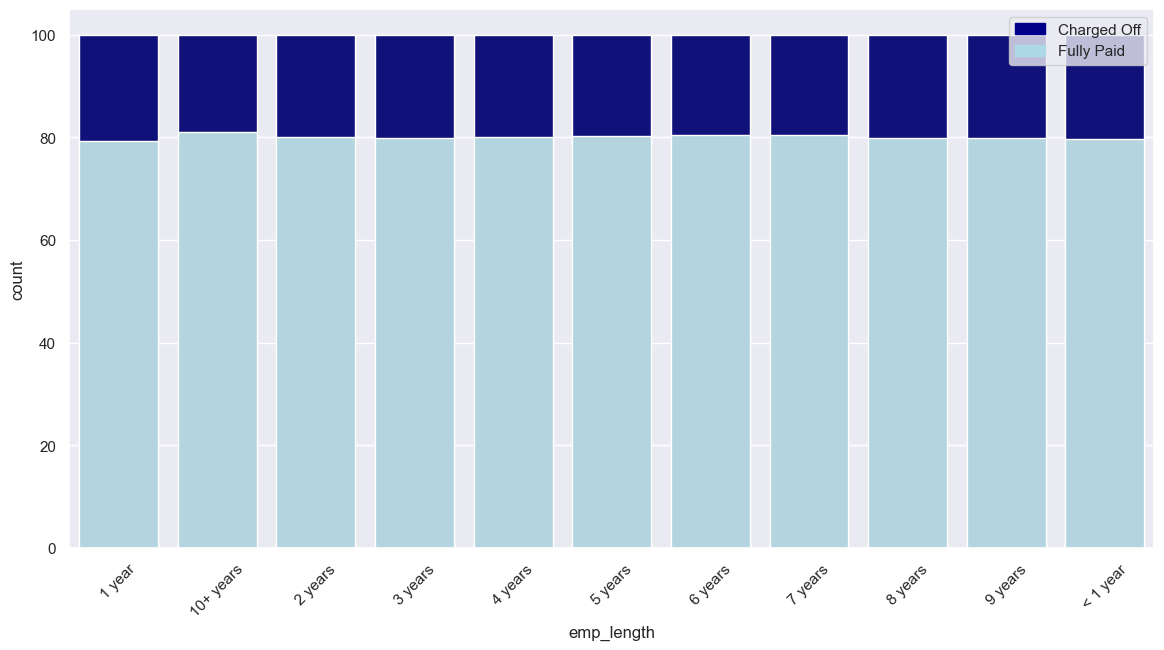

In [55]:
plt.figure(figsize=(14, 7))

# from raw value to percentage
total2['count'] = [i / j * 100 for i,j in zip(total2['count'], total['count'])]
total['count'] = [i / j * 100 for i,j in zip(total['count'], total['count'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="emp_length",  y="count", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="emp_length", y="count", data=total2, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Charged Off')
bottom_bar = mpatches.Patch(color='lightblue', label='Fully Paid')
plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation=45)

# show the graph
plt.show()

### home_ownership

C:\Users\abhis\AppData\Local\Temp\ipykernel_26904\1511399438.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



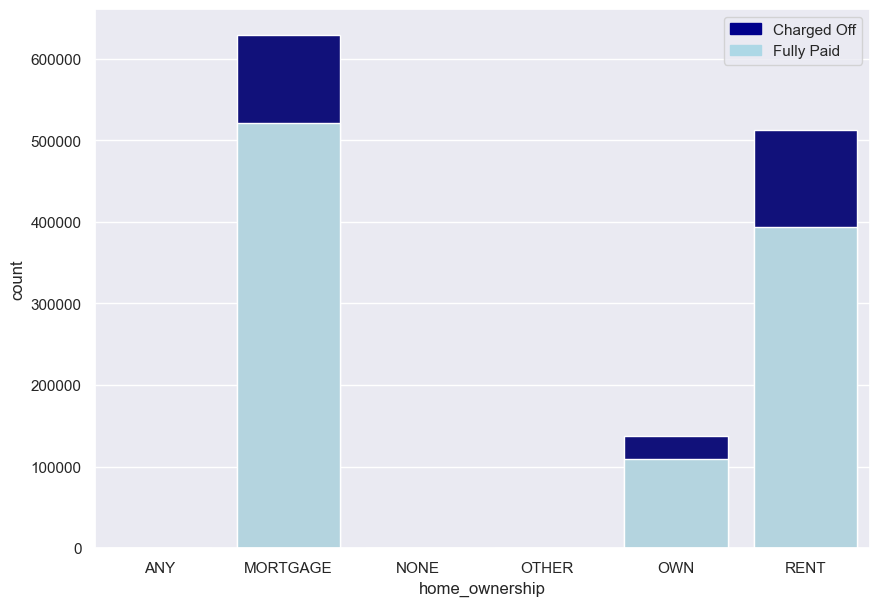

In [56]:


sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(10, 7))

# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = pd.DataFrame(df.groupby('home_ownership')['home_ownership'].count())
total.rename(columns={"home_ownership":"count"}, inplace=True)
total["home_ownership"] = total.index

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="home_ownership", y="count", data=total, color='darkblue')

# bottom bar ->  take only smoker=Yes values from the data
loan_status = df[df.loan_status == 'Fully Paid']

total2 = pd.DataFrame(loan_status.groupby('home_ownership')['home_ownership'].count())
total2.rename(columns={"home_ownership":"count"}, inplace=True)
total2["home_ownership"] = total2.index

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="home_ownership", y="count", data=total2, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Charged Off')
bottom_bar = mpatches.Patch(color='lightblue', label='Fully Paid')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

### verification_status

C:\Users\abhis\AppData\Local\Temp\ipykernel_26904\1035374579.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



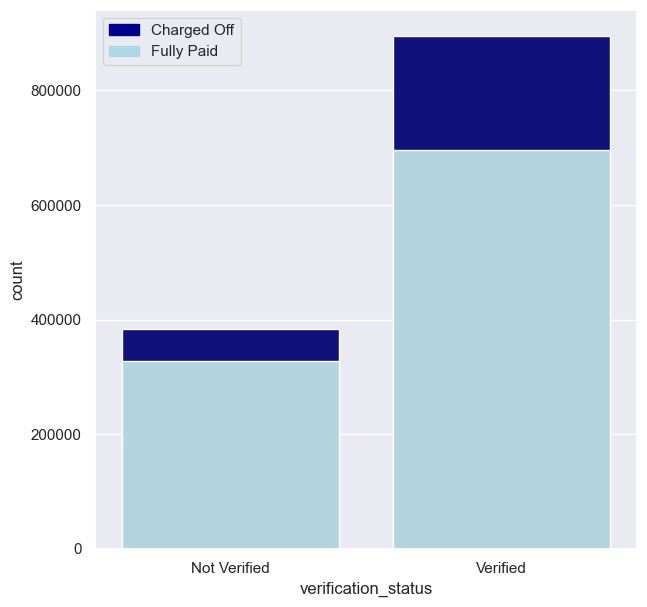

In [57]:
sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(7, 7))

# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = pd.DataFrame(df.groupby('verification_status')['verification_status'].count())
total.rename(columns={"verification_status":"count"}, inplace=True)
total["verification_status"] = total.index

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="verification_status", y="count", data=total, color='darkblue')

# bottom bar ->  take only smoker=Yes values from the data
loan_status = df[df.loan_status == 'Fully Paid']

total2 = pd.DataFrame(loan_status.groupby('verification_status')['verification_status'].count())
total2.rename(columns={"verification_status":"count"}, inplace=True)
total2["verification_status"] = total2.index

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="verification_status", y="count", data=total2, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Charged Off')
bottom_bar = mpatches.Patch(color='lightblue', label='Fully Paid')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

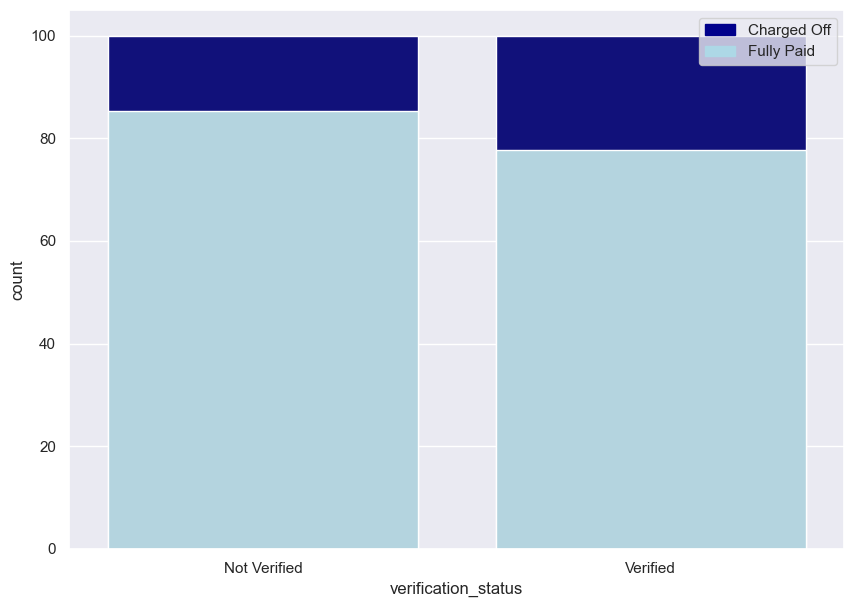

In [58]:
plt.figure(figsize=(10, 7))

# from raw value to percentage
total2['count'] = [i / j * 100 for i,j in zip(total2['count'], total['count'])]
total['count'] = [i / j * 100 for i,j in zip(total['count'], total['count'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="verification_status",  y="count", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="verification_status", y="count", data=total2, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Charged Off')
bottom_bar = mpatches.Patch(color='lightblue', label='Fully Paid')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

# Numerical data was analysed using Power BI